In [2]:
import numpy as np
import cv2
import numpy as np
from demo_utils import *
import tqdm

In [3]:
zqs = [31,1201,201,8]
cnum=np.prod(zqs)
bs = cnum*8
offset = 0
# dist = np.reshape(np.fromfile("/home/wzy/segment-anything/data/data1/dist.bin",offset=offset,count=cnum),zqs,'F')
dist=np.load("/home/wzy/segment-anything/data/data1/newd.npy")
zpos_lis=np.load("/home/wzy/segment-anything/data/data1/zpos.npy")

In [32]:
zpos_lis[750]

2671.5062312553696

In [9]:
dist.shape

(10, 1001, 31, 401)

In [22]:
image=dist[8,720,:,:]
print(image.shape)
image=image.transpose(1,0)
image.shape

(31, 401)


(401, 31)

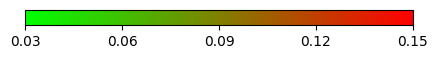

In [153]:
import copy
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
fig, axes = plt.subplots(1, 1, figsize=(5, 0.2))
fig.subplots_adjust(hspace=4)
colors = [(0, 1, 0), (1, 0, 0)]  # 绿色到红色

# 创建颜色映射对象
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# 第一个colorbar使用线性的Normalize.
# cmap1 = copy.copy(mpl.cm.viridis)
norm1 = mpl.colors.Normalize(vmin=0.03, vmax=0.15)
im1 = mpl.cm.ScalarMappable(norm=norm1, cmap=custom_cmap)
cbar1 = fig.colorbar(
    im1, cax=axes, orientation='horizontal',
    ticks=np.linspace(0.03, 0.15, 5),
    
)

/tmp/ipykernel_203144/3432541372.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


0
1
2
3
4


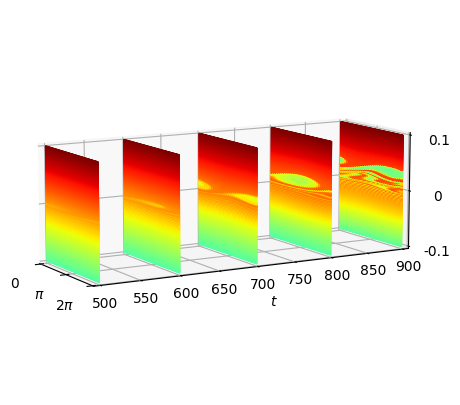

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d

# 生成一些示例数据
def generate_image(i):
    image=dist[i,750,:,:]
    return image.transpose(1,0)

images = [generate_image(i) for i in range(5,10)]

# 设置图像范围
extent = [0, 2 * np.pi, -0.1, 0.1]

# 创建图形和3D子图
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
# fig, ax = plt.subplots( figsize=(12, 6),subplot_kw={'projection': '3d'})
fig = plt.figure(figsize=(5, 5))
# 创建3D子图
ax = fig.add_subplot(111, projection='3d')
# 设置坐标轴标签
# ax.set_xlabel(r'$\theta$',labelpad=-1)
ax.set_xticks([0,np.pi,2*np.pi],["0",r"$\pi$",r"$2\pi$"])
ax.set_ylabel(r'$t$',labelpad=15)
ax.set_zticks([-0.1,0,0.1],[-0.1,0,0.1])
ax.set_zlabel(r'$\Omega$')
plt.tight_layout()
# 设置坐标轴范围
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(500, 100*len(images)-100+500)
ax.set_zlim(-0.1, 0.1)

# 绘制多个二维热图
for i, image in enumerate(images):
    print(i)
    offset = i * 100+500 
    X = np.linspace(0, 2 * np.pi, image.shape[1])
    Y = np.linspace(-0.1, 0.1, image.shape[0])
    X, Y = np.meshgrid(X, Y)
    Z = np.full_like(X, offset)
    
    ax.plot_surface(X, Z, Y, rstride=1, cstride=1, facecolors=plt.cm.jet(image/np.max(image)), shade=False,
                    vmin=0.03, vmax=0.15, cmap='viridis')

ax.view_init(elev=10, azim=-30)
ax.set_box_aspect([1, 3, 1])
plt.cm.jet.set_under('blue')
# cax = fig.add_subplot(212)
# # 添加颜色条，并放置在子图上方
# mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet)
# mappable.set_array(images[0])
# mappable.set_clim(vmin=np.min(images[0]), vmax=np.max(images[0]))
# cbar = plt.colorbar(mappable, ax=cax, orientation='horizontal', shrink=0.3)  # 设置ax参数
# cbar.set_label('Color Bar')
# 显示图像
plt.show()


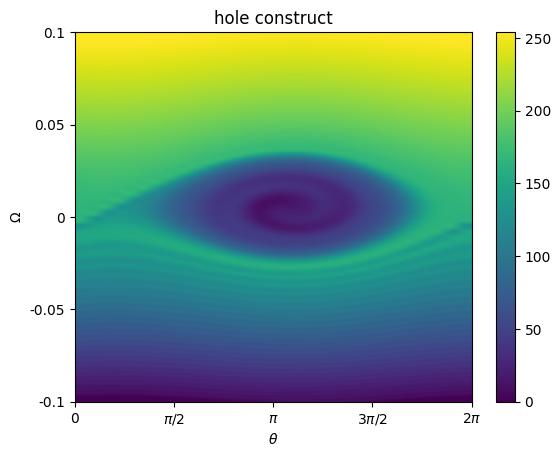

In [4]:
image=dist[8,720,:,:]
image=image.transpose(1,0)
image=getImage(image,(256,256)) 
# plt.axis("off")
plt.xlim(0,2*np.pi)
plt.ylim(-0.1,0.1)
plt.xlabel(r"$\theta$")
plt.xticks([0, np.pi/2, np.pi, np.pi*1.5, 2*np.pi],["0",r"$\pi/2$",r"$\pi$",r"$3\pi/2$",r"$2\pi$"])
plt.ylabel(r"$\Omega$")
plt.yticks([-0.1,-0.05,0,0.05,0.1],[-0.1,-0.05,0,0.05,0.1])
plt.title("hole construct")
plt.imshow(image,origin="lower",extent=[0, 2 * np.pi, -0.1, 0.1], aspect='auto')
plt.gca().set_aspect('auto', adjustable='box')
plt.colorbar()
plt.show()

100%|██████████| 201/201 [00:00<00:00, 278.08it/s]


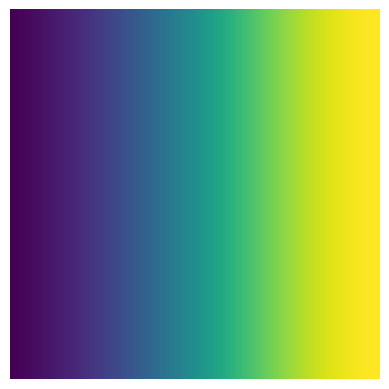

In [8]:
for i in tqdm.tqdm(range(201)):
    image=dist[:,:,i,7]
    image=getImage(image,(256,256))
    plt.axis("off")
    plt.imshow(image)
    # image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"/home/wzy/segment-anything/data/images2/{i}.jpg",image)